In [1]:
#Chap5

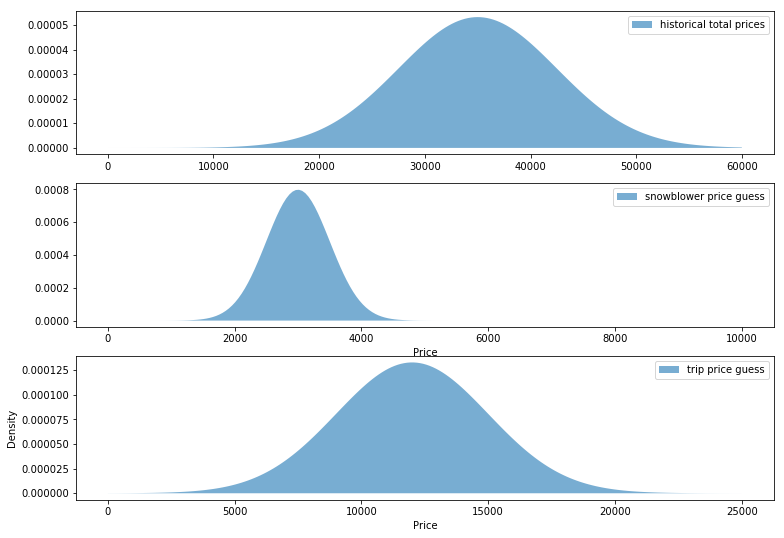

In [7]:
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figsize(12.5, 9)

norm_pdf = stats.norm.pdf

plt.subplot(311)
x = np.linspace(0, 60000, 200)
plt.fill_between(x, 0, norm_pdf(x, 35000, 7500), lw=3, alpha=0.6, label="historical total prices")
plt.legend()


plt.subplot(312)
x = np.linspace(0, 10000, 200)
plt.fill_between(x, 0, norm_pdf(x, 3000, 500), lw=3, alpha=0.6, label="snowblower price guess")
plt.xlabel("Price")
plt.legend()

plt.subplot(313)
x = np.linspace(0, 25000, 200)
plt.fill_between(x, 0, norm_pdf(x, 12000, 3000), lw=3, alpha=0.6, label="trip price guess")
plt.xlabel("Price")
plt.legend()

plt.ylabel("Density")

In [15]:
import pymc as pm

# 平均
data_mu = [3000, 12000]
# 標準偏差
data_std = [5000, 3000]

# 事前分布の平均と分散
mu_prior = 35000
std_prior = 7500

# それぞれ確率分布を作成
true_price = pm.Normal("true_price", mu_prior, 1.0/std_prior**2)
prize_1 = pm.Normal("first_price", data_mu[0], 1.0/data_std[0]**2)
prize_2 = pm.Normal("second_price", data_mu[1], 1.0/data_std[1]**2)

price_estimate = prize_1 + prize_2

@pm.potential
def error(true_price=true_price, price_estimate=price_estimate):
    return pm.normal_like(true_price, price_estimate, 1/(3000)**+2)

mcmc = pm.MCMC([true_price, prize_1, prize_2, price_estimate, error])
mcmc.sample(50000, 10000)

price_trace = mcmc.trace("true_price")[:]

 [-----------------100%-----------------] 50000 of 50000 complete in 5.3 sec

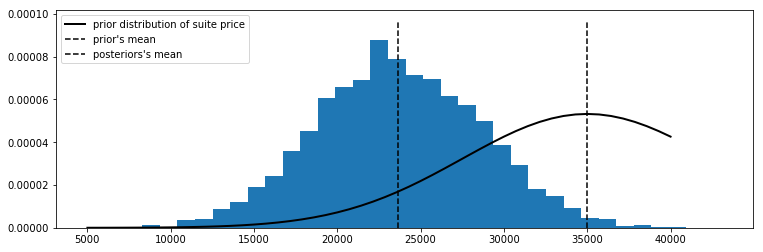

In [35]:
figsize(12.5, 4)
import scipy.stats as stats

x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c="k", lw=2, label="prior distribution of suite price")

_hist = plt.hist(price_trace, bins=35, normed=True, histtype="stepfilled")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), linestyles="--", label="prior's mean")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), linestyles="--", label="posteriors's mean")

plt.legend(loc="upper left")

In [ ]:
def showcase_loss(guess, true_price, risk=80000):
    if true_price < guess:
        return risk
    elif abs(tru_price- guess) <= 250:
        return -2*np.abs(true_price)
    else:
        return np.abs(true_price - guess - 250)